In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = pd.read_csv('E:/Personal/Data Science/Python/Data Sets/iris.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# splitting the dependent and independant variables
X = pd.DataFrame(iris.iloc[:,:-1])
y = pd.DataFrame(iris.iloc[:,-1])

In [8]:
# splitting the train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 25)

In [10]:
# building the Random forest model
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 100)  # number of trees to be build
rclf.fit(X_train,y_train)

C:\Users\Sunil Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# predicting the model
y_pred = rclf.predict(X_test)

In [12]:
# model performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  1]
 [ 0  1  7]]
0.9333333333333333


In [16]:
# finding important features
feature_imp = pd.Series(rclf.feature_importances_ , index = X_train.columns).sort_values(ascending = False)
feature_imp

petal_width     0.513186
petal_length    0.388842
sepal_length    0.080291
sepal_width     0.017681
dtype: float64

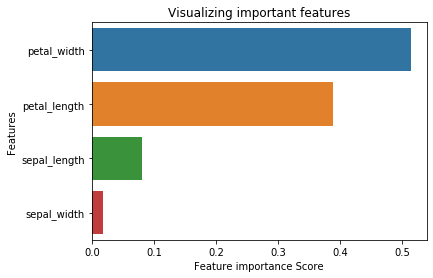

In [20]:
# visualizing the important features
sns.barplot(x = feature_imp , y=feature_imp.index)
plt.xlabel('Feature importance Score')
plt.ylabel('Features')
plt.title('Visualizing important features')
plt.show()


In [21]:
# building a new model with only  top 2 important features ie petal width and petal length
X = iris[['petal_width','petal_length']]
y = iris['species']


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 25)


In [25]:
# building the Random forest model
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(n_estimators = 100)  # number of trees to be build
rclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# predicting the model
y_pred = rclf.predict(X_test)

In [27]:
# model performance metrics
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[17  0  0]
 [ 0 13  3]
 [ 0  0 12]]
0.9333333333333333


In [ ]:
# accuracy for both the model is about same, so we can conclude that we dont need to take all the features from the dataset.